<a href="https://colab.research.google.com/github/cristianmejia00/kajikawa_lab/blob/master/Python-2021/Practice_4_titech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Methodology of Mathematical and Computational Analysis II  
Graduate Major in Technology and Innovation Management  
Tokyo Institute of Technology  
2021 - Q2  
Class 6, Programming exercise 2  

Sasahara Kazutoshi, Mejia Cristian  
contact: mejia.c.aa@m.titech.ac.jp   

---
Data and materials: https://drive.google.com/drive/folders/1qJzzQhdCYuzkqteBJxnmzglPMWaP9s_-

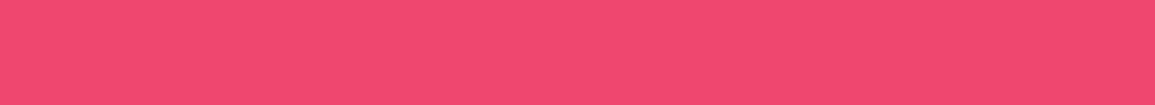


## Part 1: Fundamentals



### Working with strings


In [ ]:
# This is a 'string' (a.k.a 'text' or 'characters')
'Hello world!'

In [ ]:
# We can also use double quotation marks
"I'm Tokodai Taro"

In [ ]:
# Or combined when makes sense
'She asked, "How are you today?"'

In [ ]:
# It can be assigned as variable
greeting = "Hello, World!"

In [ ]:
# And printed in the console
print(greeting)

In [ ]:
# We can replace characters
greeting.replace("!", "?")

In [ ]:
# Strings can be concatenated with '+'
statement = "Hello, " + "World!"
print(statement)

In [ ]:
# Don't forget to add spaces when using '+'
print("This " + "is " + "a " + "longer " + "statement.")

In [ ]:
# String can be part of a list
words = ['this','is','a','list', 'of', 'words']
words

In [ ]:
# We can join them with speace
joined_text = " ".join(words)
joined_text

In [ ]:
# Or split them back
split_text = joined_text.split()
split_text

🔴 #1
#### Your turn!  
Transform the followin paragraph into a list of words:

Tokyo Institute of Technology is a national research university located in Greater Tokyo Area, Japan. Tokyo Tech is the largest institution for higher education in Japan dedicated to science and technology.

In [ ]:
# Your code here:


---

A key part of NLP is is text processing and transforming text into mathematical objects.
NLTK provides various functions that help us transform the text into vectors. The most basic NLTK function for this purpose is tokenization, which splits a document into a list of units. These units could be words, alphabets, or sentences.  

In the following sections we are going to use NLTK for several cleaning steps needed in text mining. 
 
  
_______  
*Note: If after loading the following blocks error appear, then click on "restart runtime" and click on 'play' again.*

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
! pip install pyLDAvis

### Tokenization

Tokenization refer to the task of splitting the strings into it's components. We call each of those components a 'token'.  
Is almost the same as 'term', or 'words'


In [ ]:
# The simplest tokenization is to just split the sentence by the space
sentence = "Who would have thought that computer programs would be analyzing human sentiments"
sentence.split()

In [ ]:
# But this can introduce problems, like the aphostrophe in English
sentence = "Let's travel to New York from Tokyo"
sentence.split()

In [ ]:
# Or other types of 'noise' introduced in social media communication
sentence = "Tokyo is a cool place!!! :P <3 #Awesome"
sentence.split()

In [ ]:
# Let's do again a simple tokenization
sentence = "A Rolex watch costs in the range of $3000.0 - $8000.0 in the USA."
sentence.split()

In [ ]:
# Standard tokenizer in NLP
from nltk.tokenize import TreebankWordTokenizer
sentence = "A Rolex watch costs in the range of $3000.0 - $8000.0 in USA."
tokenizer = TreebankWordTokenizer()
tokenizer.tokenize(sentence)

In [ ]:
# Tokenization for Twitter
from nltk.tokenize import TweetTokenizer
sentence = "@amankedia I'm going to buy a Rolexxxxxxxx watch!!! :-D #happiness #rolex <3"
tokenizer = TweetTokenizer(reduce_len=True, strip_handles=True)
tokenizer.tokenize(sentence)

### Stemming

Imagine bringing all of the words computer, computerization, and computerize into one word, compute. What happens here is called stemming. As part of stemming, a crude attempt is made to remove the inflectional forms of a word and bring them to a base form called the stem. The chopped-off pieces are referred to as affixes. In the preceding example, compute is the base form and the affixes are r, rization, and rize, respectively. One thing to keep in mind is that the stem need not be a valid word as we know it. For example, the
word traditional would get stemmed to tradit, which is not a valid word in the English dictionary.

In [ ]:
plurals = ['caresses', 'flies', 'dies', 'mules', 'died', 'agreed', 'owned',
'humbled', 'sized', 'meeting', 'stating',
 'siezing', 'itemization', 'traditional', 'reference', 'colonizer',
'plotted', 'having', 'generously']

In [ ]:
# Porter stemmer
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
singles = [stemmer.stem(plural) for plural in plurals]
print(' '.join(singles))

In [ ]:
# Snowball stemmer #Better.
from nltk.stem.snowball import SnowballStemmer
stemmer2 = SnowballStemmer(language='english')
singles = [stemmer2.stem(plural) for plural in plurals]
print(' '.join(singles))

### Lemmatization  

Unlike stemming, wherein a few characters are removed from words using crude methods,
lemmatization is a process wherein the context is used to convert a word to its meaningful
base form. It helps in grouping together words that have a common base form and so can
be identified as a single item. The base form is referred to as the lemma of the word and is
also sometimes known as the dictionary form

In [ ]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
singles = [lemmatizer.lemmatize(plural) for plural in plurals]
print(' '.join(singles))

In [ ]:
# Other example
tokens = ['We', 'are', 'putting', 'in', 'efforts', 'to', 'enhance', 'our', 'understanding', 'of', 'Lemmatization']
lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
print(' '.join(lemmatized_tokens))

However, the NLTK lemmatizer needs to know the Part of Speech (POS) of the words to work well. 

POS refers to the list of 

In [ ]:
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')

##This is a common method which is widely used across the NLP community of practitioners and readers
def get_part_of_speech_tags(token):
    """Maps POS tags to first character lemmatize() accepts.
    We are focusing on Verbs, Nouns, Adjectives and Adverbs here."""
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    tag = nltk.pos_tag([token])[0][1][0].upper()
    return tag_dict.get(tag, wordnet.NOUN)

In [ ]:
lemmatized_tokens = [lemmatizer.lemmatize(token, get_part_of_speech_tags(token)) for token in tokens]
print(' '.join(lemmatized_tokens))

In [ ]:
# Use spacy lemmatizer
import spacy
nlp = spacy.load('en')
doc = nlp("We are putting in efforts to enhance our understanding of Lemmatization")
" ".join([token.lemma_ for token in doc])

### Stopwords

Stopwords are words such as a, an, the, in, at, and so on that occur frequently in text corpora and do not carry a lot of information in most contexts.

In [ ]:
import nltk
stopwords = nltk.corpus.stopwords.words('english')
print(stopwords)

Since NLTK provides us with a list of stop words, we can simply look up this list and filter
out stop words from our word list:

In [ ]:
newtokens=[word for word in tokens if word not in stopwords]
print(newtokens)

### Case folding  
Another strategy that helps with normalization is called case folding. As part of case folding, all the letters in the text corpus are converted to lowercase.  

In [ ]:
sentence = "We are putting in efforts to enhance our understanding of Lemmatization"
sentence = sentence.lower()
sentence

## Text preprocessing pipeline

In [ ]:
sentence = """2000 2000 2020 2021 Harry Potter is a series of seven fantasy novels written by British author J. K. Rowling. Harry Potter, and his friends fight against Lord Voldemort, a dark wizard who intends subjugate all wizards and Muggles (non-magical people)."""

In [ ]:
# Get the tokens
from nltk.tokenize import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()
tokens = tokenizer.tokenize(sentence.lower())
tokens

In [ ]:
# To lowercase
tokens = [token.lower() for token in tokens]
tokens

In [ ]:
# Remove symbols
from string import punctuation
punctuation_list = set(punctuation)
tokens = [token for token in tokens if token not in punctuation_list]
tokens

In [ ]:
# Remove stopwords
from nltk.corpus import stopwords
stopwords_list = set(stopwords.words('english'))
tokens = [token for token in tokens if token not in stopwords_list]
tokens

In [ ]:
# Remove custom words
mystopwords = ["j.", "k.", "fantasy"]
tokens = [token for token in tokens if token not in mystopwords]
tokens

In [ ]:
# Remove numbers
tokens = [token for token in tokens if token.isalpha()]
tokens

In [ ]:
# Stemming (or lemmatization)
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer(language='english')
tokens = [stemmer.stem(token) for token in tokens]
tokens

For ilustration purposes we have done, everything step-by-step in this notebook.  In practice, is recommended to have a function that aggregates all these steps at once. So we can reuse it.

In [ ]:
# Putting everything together

# Load libraries
from nltk.tokenize import TreebankWordTokenizer
from string import punctuation
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

# Initiate values
tokenizer = TreebankWordTokenizer()
stemmer = SnowballStemmer(language='english')
punctuation_list = set(punctuation)
stopwords_list = set(stopwords.words('english'))
my_stopwords = ["j.", "k.", "fantasy"]

# Define a function
def preprocessing(document):
  tokens = tokenizer.tokenize(document.lower())
  tokens = [token.lower() for token in tokens]
  tokens = [token for token in tokens if token not in punctuation_list]
  tokens = [token for token in tokens if token not in stopwords_list]
  tokens = [token for token in tokens if token not in my_stopwords]
  tokens = [token for token in tokens if token.isalpha()]
  tokens = [stemmer.stem(token) for token in tokens]

  clean_document = " ".join(tokens)
  return clean_document

In [ ]:
# Let's recap
# This is the original sentence
sentence

In [ ]:
# This is the clean sentence
preprocessing(sentence)

🔴 #2
#### Your turn!  
Pick any text in English and clean it. 

In [ ]:
# Your code here:


In [ ]:
# Other cases (Optional)
import re

# Remove numbers within a text in the token
# For instance: "4files" -> "files"
pattern = '[0-9]'
tokens = [re.sub(pattern, '', token) for token in tokens]

# Remove symbols within a text in the token
# For instance: "mejia@titec.com" -> "mejiatitechcom"
from string import punctuation
tokens = [re.sub(punctuation, '', token) for token in tokens]

## Analyzing one document

In this section, we compute simple stats from the example sentence.

In [ ]:
# Get the term frequencies (TF)
from collections import Counter
bag_of_words = Counter(tokens)
bag_of_words

In [ ]:
# Most common terms 
bag_of_words.most_common() # Sorts everything
bag_of_words.most_common(4) # Sorts and shows only the top 4

In [ ]:
# Number of time the term "harri" appears
bag_of_words['harri']

In [ ]:
# Length of the vocabulary (i.e. number of unique terms)
len(bag_of_words)

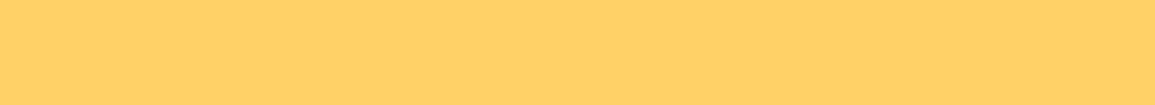

## Part 2: Analyzing multiple documents

Now, we can move to analyze larger datasets with multiple documents.  
In this exercise we received a dataset compsed of 300 academic articles. The dataset contains the titles, abstract, author and publication years.  

Here, we are going to use the title and abstract to try to infer how many topics are hidden in this dataset.

You can download the datasets here:  
https://drive.google.com/drive/folders/1qJzzQhdCYuzkqteBJxnmzglPMWaP9s_-?usp=sharing

In [ ]:
# Load libraries
import pandas as pd
import numpy as np

In [ ]:
# Load the dataset
dataset = pd.read_csv("papers.csv")
dataset.head()

In [ ]:
# If you have problem uploading the data manually, uncomment the following two lines and run this cell.
#dataset = pd.read_csv("https://raw.githubusercontent.com/cristianmejia00/kajikawa_lab/master/Python-2021/papers.csv")
#dataset.head()

We see there are some 'Nan' values in the columns. This causes problems when doing text mining. Hence, we need to replace them with an empty string.

In [ ]:
# Replace NaN to empty characters
dataset = dataset.replace(np.nan, '', regex=True)
dataset.head()

In [ ]:
# Analyze Title and Abstract
papers_text = dataset['TI'] + " " + dataset["AB"]
corpus = pd.Series(papers_text)
corpus

In [ ]:
# Check a single document by location
corpus.iloc[1]

We need to clean the text. In the previous section we defined a cleaning function with the options we want to clean. Here, we just apply that function.

In [ ]:
# Clean each document
clean_corpus = []
for document in corpus:
  clean_corpus.append(preprocessing(document))
clean_corpus = pd.Series(clean_corpus)

In [ ]:
# Check a single clean document by location
clean_corpus.iloc[1]

In [ ]:
# Term Frequency (TF)
from sklearn.feature_extraction.text import CountVectorizer
tf_vectorizer = CountVectorizer()
tf_matrix = tf_vectorizer.fit_transform(clean_corpus)

In [ ]:
print(tf_vectorizer.get_feature_names())
print(tf_matrix.toarray())
print(tf_matrix.shape)

In [ ]:
# Term Frequency (TF) consider only top 500 most frequent terms
tf_vectorizer = CountVectorizer(max_features = 500)
tf_matrix = tf_vectorizer.fit_transform(clean_corpus)

In [ ]:
print(tf_vectorizer.get_feature_names())
print(tf_matrix.toarray())
print(tf_matrix.shape)

In [ ]:
# Term Frequency Inverse Document Frequency (TFIDF)
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features = 500)
tfidf_matrix = tfidf_vectorizer.fit_transform(clean_corpus)

In [ ]:
print(tfidf_vectorizer.get_feature_names())
print(tfidf_matrix.toarray())
print(tfidf_matrix.shape)

### Document similarity  

In this section, we use text mining to extract the documents that are the most similar to another. Here, we are using the cosine similarity which the most well-spread measure in text mining.  

In [ ]:
# Cosine similarity of documents:
from sklearn.metrics.pairwise import cosine_similarity
cosine_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [ ]:
cosine_matrix.shape
print(cosine_matrix)

In [ ]:
# Convert to dataframe
cosine_df = pd.DataFrame(cosine_matrix, 
                  columns = dataset["TI"], 
                  index=dataset["TI"])
cosine_df.head()

In [ ]:
# Find the most similar documents when we know the title or the location of the document
# Find the most similar articles to "High-performance medicine: the convergence of human and artificial intelligence"

doc_index = 1 #cosine_df.columns.get_loc("High-performance medicine: the convergence of human and artificial intelligence")
simmilar_docs = cosine_df.iloc[:, doc_index]
simmilar_docs.sort_values(ascending=False).head(20)

🔴 #3
#### Your turn!  
Find the 10 most similar articles to:
"Emerging applications of bedside 3D printing in plastic surgery"

In [ ]:
# Your code here:


### Topic Classification using Topic Models

In [ ]:
# Topic Models
from sklearn.decomposition import NMF, LatentDirichletAllocation

no_topics = 3
dictionary = tf_vectorizer.get_feature_names()

# Run NMF
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf_matrix)

# Run LDA
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf_matrix)

In [ ]:
def display_topics(model, token_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print ("Topic %d:" % (topic_idx))
        print (" ".join([token_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 20

In [ ]:
display_topics(nmf, dictionary, no_top_words)

In [ ]:
display_topics(lda, dictionary, no_top_words)

In [ ]:
! pip install pyLDAvis

In [ ]:
import pyLDAvis.sklearn

tf_vectorizer = CountVectorizer(max_features = 500)
tf_matrix = tf_vectorizer.fit_transform(clean_corpus)
panel = pyLDAvis.sklearn.prepare(lda, tf_matrix, tf_vectorizer, mds='tsne')
pyLDAvis.display(panel)
# Note: in the visualization, topics changed the order. 

### Document classification  

In [ ]:
# "Climate change" from Wikipedia
new_document = "Climate change includes both global warming driven by human-induced emissions of greenhouse gases and the resulting large-scale shifts in weather patterns. Though there have been previous periods of climatic change, since the mid-20th century humans have had an unprecedented impact on Earth's climate system and caused change on a global scale"

clean_new_document = preprocessing(new_document)
clean_new_document = pd.Series(clean_new_document)
tf_clean_new_document = tf_vectorizer.transform(clean_new_document)
lda_prediction = lda.transform(tf_clean_new_document)
print(lda_prediction)

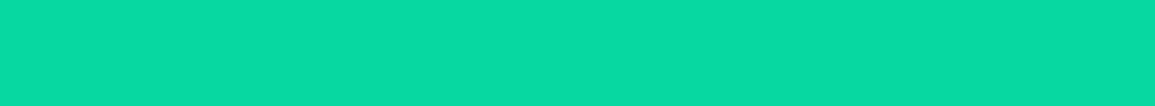

## Part 3: Sentiment Analysis  

**Valence Aware Dictionary and sEntiment Reasoner (VADER)** is a recently developed lexicon-based sentiment analysis tool whose accuracy is shown to be much greater than the existing lexicon-based sentiment analyzers. This model was developed by computer science professors from Georgia Tech and they have published the methodology of building the lexicon in their very easy-to-read [paper](http://comp.social.gatech.edu/papers/icwsm14.vader.hutto.pdf). It improves on other sentiment analyzers by including colloquial language terms, emoticons, slang, acronyms, and so on, which are used generously in social media. It also factors in the intensity of words rather than classifying them as simply positive or negative.

Here, we can see that VADER outputs the negative score, neutral score, and positive score and then aggregates them to calculate the compound score. The compound score is what we are interested in. Any score greater than 0.05 is considered positive, while less than -0.05 is considered negative


In [ ]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
vader_analyzer = SentimentIntensityAnalyzer()

In [ ]:
# Test some sentences
text1 = "In three years, everyone will be happy."
text2 = "I am so excited about the concert."
text3 = "I do not like this car."
vader_analyzer.polarity_scores(text3)

### Sentiment Analysis of Trump Tweets  

We are goin to analyze a dataset of tweets tweeted by former U.S. president Trump. The time coverage is from 2015 to 2020.  

We will observer the trend of sentiment of his tweets.

In [ ]:
# Load the dataset. 
tweets = pd.read_csv("trump_tweets.csv", parse_dates=True)
tweets.head()

In [ ]:
# If you have problem uploading the data manually, uncomment the following two lines and run this cell.
# dataset = pd.read_csv("https://raw.githubusercontent.com/cristianmejia00/kajikawa_lab/master/Python-2021/trump_tweets.csv")
# dataset.head()

In [ ]:
# How many tweets are there?
len(tweets)

In [ ]:
# Add the sentiment scores for Trump tweets to the dataset
tweets['polarity_scores'] = tweets.text.apply(vader_analyzer.polarity_scores)
tweets['vader_compound'] = tweets.polarity_scores.apply(lambda x: x['compound'])
tweets['vader_neg'] = tweets.polarity_scores.apply(lambda x: x['neg'])
tweets['vader_neu'] = tweets.polarity_scores.apply(lambda x: x['neu'])
tweets['vader_pos'] = tweets.polarity_scores.apply(lambda x: x['pos'])
tweets.head()

In [ ]:
# Grouping sentiment scores by day to get average daily sentiment scores
from datetime import datetime as dt
dt_sentiment_dmy = tweets.vader_compound.groupby(tweets.date_dmy).mean().reset_index()
dt_sentiment_dmy['date_dmy'] = dt_sentiment_dmy.date_dmy.apply(lambda x: dt.strptime(x, '%Y-%m-%d'))
dt_sentiment_dmy.head()

In [ ]:
# Plot the compound score by day
import seaborn as sns
sns.lineplot(x = "date_dmy", y = "vader_compound", data = dt_sentiment_dmy)

In [ ]:
# Group each sentiment score by days
dt_all_sentiment = tweets[['vader_pos', 'vader_neu', 'vader_neg', 'vader_compound']].groupby(tweets.date_dmy).mean().reset_index()
dt_all_sentiment['date_dmy'] = dt_all_sentiment.date_dmy.apply(lambda x: dt.strptime(x, '%Y-%m-%d'))
dt_all_sentiment.head()

In [ ]:
# Obtain statistics of each sentiment
dt_all_sentiment.describe()

In [ ]:
# Plot the scores of negative tweets
sns.lineplot(x = "date_dmy", y = "vader_neg", data = dt_all_sentiment)

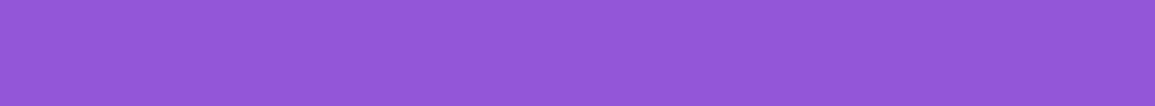

## Part 4: Word2Vec

In [ ]:
# Import the library and load the model
# This can take upto 5 min to load
import gensim.downloader as api
word_vectors = api.load("glove-wiki-gigaword-100")

In [ ]:
# Check the vocabulary size
len(word_vectors.wv.vocab)

In [ ]:
# Check the vector size
word_vectors.vector_size

In [ ]:
# Extract similar keywords
word_vectors.most_similar('tokyo')

In [ ]:
# Test a typical example of Word2Vec
result = word_vectors.most_similar(positive=['man', 'queen'], negative=['king'], topn=1)
print(result)

In [ ]:
# Let's try other escenario
result = word_vectors.most_similar(positive=['sushi', 'spain'], negative=['japan'], topn=5)
print(result)

In [ ]:
# change 'sports' to 'chicago'
word_vectors.doesnt_match("tokyo sports washington miami".split())

## References  

Books:
* Hands-On Python Natural Language Processing by Aman Kedia Mayank Rasu
* Natural Language Processing in Action by Hobson Lane, Cole Howard, and Hannes Max Hapke

Others:
* https://voyant-tools.org/
* https://blog.mlreview.com/topic-modeling-with-scikit-learn-e80d33668730
* https://shravan-kuchkula.github.io/topic-modeling/get-the-top-15-keywords-from-each-topic
* https://github.com/naingthet/trump-tweets-nlp
* https://radimrehurek.com/gensim/models/word2vec.html


In [ ]:
# Note.
# Cosine simmilarity of terms:
from sklearn.metrics.pairwise import cosine_similarity
cosine_matrix = cosine_similarity(np.transpose(tfidf_matrix), numpy.transpose(tfidf_matrix))